In [10]:
import os
import sys
from glob import glob
from typing import List

import numpy as np

import torch
import torch.nn as nn
from torchvision import transforms

from PIL import Image

In [2]:
def get_data_path_list(data_dir:str):
    data_dir = './data/hymenoptera_data'
    train_dir = os.path.join(data_dir, 'train')
    val_dir = os.path.join(data_dir, 'val')

    glob_regex = f"{train_dir}/**/*.jpg"
    train_file_list = glob(glob_regex, recursive=True)

    glob_regex = f"{val_dir}/**/*.jpg"
    val_file_list = glob(glob_regex, recursive=True)

    file_list_dict = {
        'train': train_file_list,
        'val': val_file_list
    }

    return file_list_dict

In [3]:
data_dir = './data'

file_list_dict = get_data_path_list(data_dir)

file_list_dict['train'].__len__()

243

In [4]:
image_path = file_list_dict['train'][0]

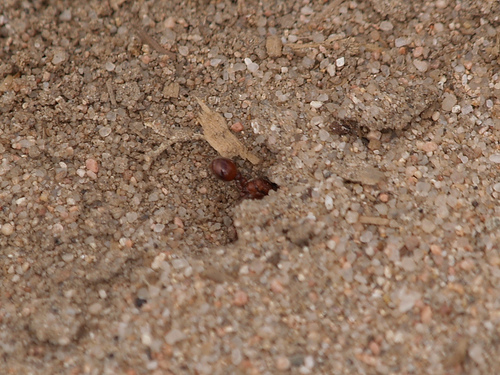

In [6]:
Image.open(image_path)

In [27]:
from Dataset import HymenopteraDataSet, get_data_path_list

VGG16_SIZE = (256, 256)
VGG16_MEAN = (0.485, 0.456, 0.406)
VGG16_STD = (0.229, 0.224, 0.225)

data_dir = './data'
data_path_list_dict = get_data_path_list(data_dir)

transform = transforms.Compose([
    transforms.Resize(size=VGG16_SIZE),
    transforms.ToTensor(),
    transforms.Normalize(mean=VGG16_MEAN, std=VGG16_STD)
])

my_dataset = HymenopteraDataSet(data_path_list_dict, phase='train', transform=transform)

In [28]:
list(my_dataset)

[(tensor([[[ 0.3994,  0.3994,  0.4679,  ...,  0.3481, -0.0287,  0.0398],
           [ 0.4166,  0.4337,  0.3138,  ...,  0.1254, -0.3712, -0.5596],
           [ 0.2111,  0.1254,  0.2796,  ...,  0.4679, -0.0287, -0.3883],
           ...,
           [ 0.5878,  0.6049,  0.5536,  ...,  0.4851,  0.4166,  0.4166],
           [ 0.4337,  0.4851,  0.4679,  ...,  0.3652,  0.3823,  0.4679],
           [ 0.3138,  0.3309,  0.3994,  ...,  0.3481,  0.3823,  0.5707]],
  
          [[ 0.0826,  0.0476,  0.2227,  ..., -0.0399, -0.3375, -0.2850],
           [-0.0049,  0.0301,  0.0826,  ..., -0.2675, -0.6527, -0.7927],
           [-0.1975, -0.1800,  0.0301,  ...,  0.0826, -0.3375, -0.5826],
           ...,
           [ 0.2577,  0.3102,  0.2052,  ...,  0.1702,  0.0826,  0.0826],
           [ 0.1527,  0.1702,  0.1352,  ...,  0.0651,  0.0476,  0.1702],
           [ 0.0301, -0.0049,  0.0826,  ...,  0.0126,  0.0126,  0.2927]],
  
          [[-0.1138, -0.1138,  0.1476,  ..., -0.3578, -0.4450, -0.2358],
           